# 1. Introduction

In this project, I will build a machine learning classifier that predicts condition of water wells in Tanzania using information about the well, such as the type of pump, when it was installed, etc.


# 2. Business Understanding

### 2 (a) Problem Statement

MSABI, one of the largest water, sanitation, and hygiene (WASH) non-profit organizations in Tanzania, has a mission to improve access to clean water for  all communities in the country. 

Despite their efforts, many water wells in Tanzania still face challenges such as being in need of repair or failing altogether, which limits access to clean water for the population.

And with a population of over 57 million, it is crucial to ensure that the country's water wells are functional and provide safe drinking water to the people.

The problem that MSABI faces is that they must prioritise their efforts and allocate resources effectively to address this issue.

But, currently, MSABU has limited information about the condition of water wells in the country making it difficult to determine which wells are most in need of attention.

### 2 (b) Main Objective

To build a classifier that can predict the codition of water wells in Tanzania and improve access to clean water for communities in the country.

### 2 (c) Specific Objectives

* Explore and understand the data related to water wells in Tanzania
* Prepocess the data and prepare it for building the classifier
* Build a machine learning model that can classify the condition of waterpoint as functional, functional but in need of repair, or non-functional
* Evaluate performance of the model and fine-tune it as needed
* Make predictions on new, unseeen data and evaluate the performance of the model
* Use the best-performing model to inform the efforts of MSABI and as a result improve access to clean water in Tanzania.


# 3. Data Understanding

The project utilizes data from Taarifa and Tanzanian Ministry of Water. The data includes information on 59,400 waterpoints.

There are three datasets available for this project, the training set labels, the training set values, and the test set values.

The target variable is "status_group" which details the functionality of waterpoints. It is a ternary classification classified as functional, functional but in need of repair, or non-functional.

The dataset includes the following features:
* amount_tsh - Total static head (amount water available to waterpoint)
* date_recorded - The date the row was entered
* funder - Who funded the well
* gps_height - Altitude of the well
* installer - Organization that installed the well
* longitude - GPS coordinate
* latitude - GPS coordinate
* wpt_name - Name of the waterpoint if there is one
* num_private -
* basin - Geographic water basin
* subvillage - Geographic location
* region - Geographic location
* region_code - Geographic location (coded)
* district_code - Geographic location (coded)
* lga - Geographic location
* ward - Geographic location
* population - Population around the well
* public_meeting - True/False
* recorded_by - Group entering this row of data
* scheme_management - Who operates the waterpoint
* scheme_name - Who operates the waterpoint
* permit - If the waterpoint is permitted
* construction_year - Year the waterpoint was constructed
* extraction_type - The kind of extraction the waterpoint uses
* extraction_type_group - The kind of extraction the waterpoint uses
* extraction_type_class - The kind of extraction the waterpoint uses
* management - How the waterpoint is managed
* management_group - How the waterpoint is managed
* payment - What the water costs
* payment_type - What the water costs
* water_quality - The quality of the water
* quality_group - The quality of the water
* quantity - The quantity of water
* quantity_group - The quantity of water
* source - The source of the water
* source_type - The source of the water
* source_class - The source of the water
* waterpoint_type - The kind of waterpoint
* waterpoint_type_group - The kind of waterpoint

# 4. Data Preparation

### Import Libraries

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

### Load Data

In [77]:
train_values = pd.read_csv("Training set values.csv")
train_labels = pd.read_csv("Training set labels.csv")

In [78]:
test_df=pd.read_csv("Test set values.csv")
test_copy=test_df.copy()

### Examine the Data

In [79]:
# Preview Train Values
train_values.head(2)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [80]:
# Preview Train labels
train_labels.head(2)

,id,status_group
0,69572,functional
1,8776,functional


In [81]:
# merge train labels and train values
train_df = train_values.merge(train_labels,on='id',how='inner')

In [82]:
#Preview the merged data set
train_df.head(2)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [83]:
#check number of rows and columns of train df
train_df.shape

(59400, 41)

In [84]:
#check number of rows and columns of test df
test_df.shape

(14850, 40)

In [85]:
#summary information of merged dataframe
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [86]:
#summary statistics of numerical columns of dataframe
train_df.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


### Data Preprocessing

Here I will perform data cleaning, and transformation to ensure quality and accuracy of the results. 

Here are the main steps I will follow:
* Handle missing values
* Drop duplicates
* Drop unnecessary columns
* Further feature engineering
* Splitting data into training and testing sets
* Encoding target variable

#### i) Handle Missing Values and Feature Engineering

In the data summary above, I noticed there were missing values in the following columns:

* funder
* installer
* subvillage
* public_meeting
* scheme_management
* scheme_name
* permit

I will focus on each column, one by one and handle missing values appropriately.

The process will as well include some feature engineering where I will group the data into smaller categories that are more useful for this analysis.

##### Funder

In [87]:
#funder
funder = train_df["funder"].value_counts()
funder_count = len(funder)
print("There are", funder_count, "funders.\n")
print("***********************************\n")
print("Here are the top 10 funders\n")
print("***********************************\n")
print(funder.head(10))


There are 1897 funders.

***********************************

Here are the top 10 funders

***********************************

Government Of Tanzania    9084
Danida                    3114
Hesawa                    2202
Rwssp                     1374
World Bank                1349
Kkkt                      1287
World Vision              1246
Unicef                    1057
Tasaf                      877
District Council           843
Name: funder, dtype: int64


I will divide the funder column into 6 categories. Each of the 5 top funders will remain as a category on its own and all the others will be grouped under others.

In [88]:
#function to divide funder column into 6 categories
#Top 5 funders will remain as a category and the rest grouped as others
def funder_categorised(train_df):
    if train_df["funder"]=="Government Of Tanzania":
        return "government"
    elif train_df["funder"] == "Danida":
        return "danida"
    elif train_df["funder"] == "Hesawa":
        return "hesawa"
    elif train_df["funder"] == "Rwssp":
        return "rwssp"
    elif train_df["funder"] == "World Bank":
        return "world_bank"
    else:
        return "other"
    
#replace data with these new categories in both test and train data
train_df["funder"] = train_df.apply(lambda row: funder_categorised(row), axis = 1)
test_df["funder"] = test_df.apply(lambda row: funder_categorised(row), axis = 1)        
    

In [89]:
#doublecheck new categories
train_df["funder"].value_counts()

other         42277
government     9084
danida         3114
hesawa         2202
rwssp          1374
world_bank     1349
Name: funder, dtype: int64

##### installer 

In [90]:
#installer
installer = train_df["installer"].value_counts()
installer_count = len(installer)
print("There are", installer_count, "installers.\n")
print("***********************************\n")
print("Here are the top 10 installers\n")
print("***********************************\n")
print(installer.head(10))


There are 2145 installers.

***********************************

Here are the top 10 installers

***********************************

DWE                   17402
Government             1825
RWE                    1206
Commu                  1060
DANIDA                 1050
KKKT                    898
Hesawa                  840
0                       777
TCRS                    707
Central government      622
Name: installer, dtype: int64


Similarly, I will divide the installer column into 6 categories. Each of the 5 top installers will remain as a category on its own and all the others will be grouped under others.

In [91]:
#function to divide installer column into 6 categories
#Top 5 installers will remain as a category and the rest grouped as others
def installer_categorised(train_df):
    if train_df["installer"]=="DWE":
        return "dwe"
    elif train_df["installer"] == "Government":
        return "government"
    elif train_df["installer"] == "RWE":
        return "rwe"
    elif train_df["installer"] == "Commu":
        return "commu"
    elif train_df["installer"] == "DANIDA":
        return "danida"
    else:
        return "other"
    
#replace data with these ew categories in both test and train data
train_df["installer"] = train_df.apply(lambda row: installer_categorised(row), axis = 1)
test_df["installer"] = test_df.apply(lambda row: installer_categorised(row), axis = 1)        


In [92]:
#doublecheck new categories
train_df["installer"].value_counts()

other         36857
dwe           17402
government     1825
rwe            1206
commu          1060
danida         1050
Name: installer, dtype: int64

With these new categories, let's see if we still have null values on the columns installer and funder

In [93]:
#double check missing values for funder column
missing_values_funder = train_df["funder"].isnull().sum()
print("The funder column has", missing_values_funder, "missing values.\n")
missing_values_installer = train_df["installer"].isnull().sum()
print("The installer column has", missing_values_funder, "missing values.\n")

The funder column has 0 missing values.

The installer column has 0 missing values.



##### subvillage

In [94]:
#subvillage
subvillage = train_df["subvillage"].value_counts()
subvillage_count = len(subvillage)
print("There are", subvillage_count, "subvillages.\n")
print("***********************************\n")
print("Here are the top 10 subvillages\n")
print("***********************************\n")
print(subvillage.head(10))

There are 19287 subvillages.

***********************************

Here are the top 10 subvillages

***********************************

Madukani    508
Shuleni     506
Majengo     502
Kati        373
Mtakuja     262
Sokoni      232
M           187
Muungano    172
Mbuyuni     164
Mlimani     152
Name: subvillage, dtype: int64


Unlike  the installers and funders columns, there is not much difference between subvillages counts thus I cannot really categorise and rank the subvillages. 

I think it is best I drop this column

In [95]:
#dropping subvillage column
train_df=train_df.drop(['subvillage'],axis=1)
test_df=test_df.drop(['subvillage'],axis=1)

##### public meeting

In [96]:
#public_meeting
public_meeting = train_df["public_meeting"].value_counts()
print(public_meeting)
missing_values_public_meeting = train_df["public_meeting"].isnull().sum()
print("\nThe public_meeting column has", missing_values_public_meeting, "missing values.\n")

True     51011
False     5055
Name: public_meeting, dtype: int64

The public_meeting column has 3334 missing values.



I will replace the missing values with 'unknown' for both test and train.



In [97]:
train_df.public_meeting = train_df.public_meeting.fillna('Unknown')
test_df.public_meeting = test_df.public_meeting.fillna('Unknown')

In [98]:
train_df["public_meeting"].value_counts()

True       51011
False       5055
Unknown     3334
Name: public_meeting, dtype: int64

In [99]:
#double check missing values for public_meeting column
missing_values_public_meeting = train_df["public_meeting"].isnull().sum()
print("\nThe public_meeting column has", missing_values_public_meeting, "missing values.\n")



The public_meeting column has 0 missing values.



##### Scheme Management

In [100]:
#scheme_management
scheme_management = train_df["scheme_management"].value_counts()
scheme_management_count = len(scheme_management)
print("There are", scheme_management_count, "scheme_managements.\n")
print("***********************************\n")
print("Here are the top 10 scheme_managements\n")
print("***********************************\n")
print(scheme_management.head(10))

There are 12 scheme_managements.

***********************************

Here are the top 10 scheme_managements

***********************************

VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Name: scheme_management, dtype: int64


Like the funder and installer column, I will divide the scheme management column into 6 categories.

Each of the 5 top scheme_management will remain as a category on its own and all the others will be grouped under others.

In [101]:
#function to divide scheme_management column into 6 categories
#Top 5 scheme_management will remain as a category and the rest grouped as others
def scheme_management_categorised(train_df):
    if train_df["scheme_management"]=="VWC":
        return "vwc"
    elif train_df["scheme_management"] == "WUG":
        return "wug"
    elif train_df["scheme_management"] == "Water authority":
        return "water_authority"
    elif train_df["scheme_management"] == "WUA":
        return "wua"
    elif train_df["scheme_management"] == "Water Board":
        return "water_board"
    else:
        return "other"
    
#replace data with these ew categories in both test and train data
train_df["scheme_management"] = train_df.apply(lambda row: scheme_management_categorised(row), axis = 1)
test_df["scheme_management"] = test_df.apply(lambda row: scheme_management_categorised(row), axis = 1)        


##### scheme name

In [102]:
#scheme_name
scheme_name = train_df["scheme_name"].value_counts()
scheme_name_count = len(scheme_name)
print("There are", scheme_name_count, "scheme_name.\n")
print("***********************************\n")
print("Here are the top 10 scheme_names\n")
print("***********************************\n")
print(scheme_name.head(10))

There are 2696 scheme_name.

***********************************

Here are the top 10 scheme_names

***********************************

K                              682
None                           644
Borehole                       546
Chalinze wate                  405
M                              400
DANIDA                         379
Government                     320
Ngana water supplied scheme    270
wanging'ombe water supply s    261
wanging'ombe supply scheme     234
Name: scheme_name, dtype: int64


From the value counts per category, and considering that there are 2696 schemes, I see that the top 5 categories only represent a fraction of the data. 

I think it's best to drop this column.

In [103]:
#drop the scheme_name column on both test and train data
train_df = train_df.drop('scheme_name', axis=1)
test_df = test_df.drop('scheme_name', axis=1)

##### permit

In [104]:
#scheme_name
permit = train_df["permit"].value_counts()
permit_count = len(permit)
print("There are", permit_count, "permit.\n")
print("***********************************\n")
print(permit)
missing_values_permit = train_df["permit"].isnull().sum()
print("\nThe permit column has", missing_values_permit, "missing values.\n")

There are 2 permit.

***********************************

True     38852
False    17492
Name: permit, dtype: int64

The permit column has 3056 missing values.



I will replace the missing values with unknown both on the test and train data set

In [105]:
train_df.permit = train_df.permit.fillna('Unknown')
test_df.permit = test_df.permit.fillna('Unknown')

#### Double check for missing values

In [106]:
train_df.apply(lambda x: sum(x.isnull()), axis=0)

id                       0
amount_tsh               0
date_recorded            0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
wpt_name                 0
num_private              0
basin                    0
region                   0
region_code              0
district_code            0
lga                      0
ward                     0
population               0
public_meeting           0
recorded_by              0
scheme_management        0
permit                   0
construction_year        0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
source_type              0
source_class             0
waterpoint_type          0
w

The data now has no missing values.

#### ii) Dealing with Duplicates

There are a few columns that appear like they represent the same information. I will investigate them further below. These are:
* waterpoint_type
* waterpoint_type_group


* source
* source_type
* source_class


* quantity
* quantity_group


* water_quality
* quality_group


* payment
* payment_type


* management
* management_group


* extraction_type
* extraction_type_group
* extraction_type_class


#### waterpoint_type

In [107]:
print(train_df['waterpoint_type'].value_counts())
print("\n*****************************************")
print(train_df['waterpoint_type_group'].value_counts())

communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: waterpoint_type, dtype: int64

*****************************************
communal standpipe    34625
hand pump             17488
other                  6380
improved spring         784
cattle trough           116
dam                       7
Name: waterpoint_type_group, dtype: int64


The two columns appear similar, only that the communal standpipe and communal standpipe multiple has been merged in the water_type_group. I will drop the waterpoint_type column

In [108]:
#drop waterpoint_type column in both test and train data
train_df=train_df.drop(['waterpoint_type'],axis=1)
test_df=test_df.drop(['waterpoint_type'],axis=1)


#### source

In [109]:
print(train_df['source'].value_counts())
print("\n*****************************************")
print(train_df['source_type'].value_counts())
print("\n*****************************************")
print(train_df['source_class'].value_counts())

spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: source, dtype: int64

*****************************************
spring                  17021
shallow well            16824
borehole                11949
river/lake              10377
rainwater harvesting     2295
dam                       656
other                     278
Name: source_type, dtype: int64

*****************************************
groundwater    45794
surface        13328
unknown          278
Name: source_class, dtype: int64


I see that source and source_type represent the same information, just that source_type has been consolidated to lesser categories. I will drop the column source.

In [110]:
#drop source column in both test and train
train_df=train_df.drop(['source'],axis=1)
test_df=test_df.drop(['source'],axis=1)

#### quantity

In [111]:
print(train_df['quantity'].value_counts())
print("\n*****************************************")
print(train_df['quantity_group'].value_counts())

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity, dtype: int64

*****************************************
enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity_group, dtype: int64


From the above, I see that these two columns contain the exact same information. I will drop the quantity column.

In [112]:
#drop quantity column in both test and train
train_df=train_df.drop(['quantity'],axis=1)
test_df=test_df.drop(['quantity'],axis=1)

#### quality

In [113]:
print(train_df["water_quality"].value_counts())
print("\n*****************************************")
print(train_df["quality_group"].value_counts())

soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64

*****************************************
good        50818
salty        5195
unknown      1876
milky         804
colored       490
fluoride      217
Name: quality_group, dtype: int64


The two columns as well represent similar information. Just that fluoride and fluoride abandoned have been merged in the quality_group column.I will drop the water_quality column. 

In [114]:
# drop water_quality column
train_df=train_df.drop(['water_quality'],axis=1)
test_df=test_df.drop(['water_quality'],axis=1)



#### payment

In [115]:
print(train_df["payment"].value_counts())
print("\n*****************************************")
print(train_df["payment_type"].value_counts())

never pay                25348
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: payment, dtype: int64

*****************************************
never pay     25348
per bucket     8985
monthly        8300
unknown        8157
on failure     3914
annually       3642
other          1054
Name: payment_type, dtype: int64


The two columns as well contain similar information. I will drop the payment column since names on payment_type are shorter.

In [116]:
#drop payment column
train_df=train_df.drop(['payment'],axis=1)
test_df=test_df.drop(['payment'],axis=1)

#### management

In [117]:
print(train_df["management"].value_counts())
print("\n*****************************************")
print(train_df["management_group"].value_counts())

vwc                 40507
wug                  6515
water board          2933
wua                  2535
private operator     1971
parastatal           1768
water authority       904
other                 844
company               685
unknown               561
other - school         99
trust                  78
Name: management, dtype: int64

*****************************************
user-group    52490
commercial     3638
parastatal     1768
other           943
unknown         561
Name: management_group, dtype: int64


From the above we can see that the two columns also contain similar information. I will drop management column.

In [118]:
#drop management column in both test and train
train_df=train_df.drop(['management'],axis=1)
test_df=test_df.drop(['management'],axis=1)

#### extraction

In [119]:
print(train_df['extraction_type'].value_counts())
print("\n*****************************************")
print(train_df['extraction_type_group'].value_counts())
print("\n*****************************************")
print(train_df['extraction_type_class'].value_counts())

gravity                      26780
nira/tanira                   8154
other                         6430
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64

*****************************************
gravity            26780
nira/tanira         8154
other               6430
submersible         6179
swn 80              3670
mono                2865
india mark ii       2400
afridev             1770
rope pump            451
other handpump       364
other motorpump      122
wind-powered    

From the above we can see that the three columns contain almost similar information. However, extraction_type_class has grouped the values in fewer categories which are better for this analysis. I will drop the other two columns.

In [120]:
#drop extraction_type group and extraction_type on both test and train df
train_df=train_df.drop(['extraction_type'],axis=1)
test_df=test_df.drop(['extraction_type'],axis=1)

train_df=train_df.drop(['extraction_type_group'],axis=1)
test_df=test_df.drop(['extraction_type_group'],axis=1)

In [121]:
#check for any other duplicates in rows using id as unique identifier
print(f'There are {train_df.duplicated().sum()} duplicates')

There are 0 duplicates


The data has no duplicates

#### iii) Drop Unnecessary Columns

In [122]:
train_df['recorded_by'].value_counts()

GeoData Consultants Ltd    59400
Name: recorded_by, dtype: int64

All the entries were recorded by GeoData Consultants Ltd. Thus, we won't be needing this column.

In [123]:
# drop recorded_by column in both test and train data
train_df=train_df.drop(['recorded_by'],axis=1)
test_df=test_df.drop(['recorded_by'],axis=1)


A description of the num_private column was not given on Driven Data. I will drop that as it appears unnecessary. The column id doesnot also add any valuable information for this analysis.

In [124]:
#drop num_private column
train_df = train_df.drop(['num_private', 'id'], axis=1)
test_df = test_df.drop(['num_private', 'id'], axis=1)

There are so many columns representing geographical information. I am going to drop all others and remain with basin.

In [125]:
#drop extra geographical information columns
train_df = train_df.drop(['gps_height', 'longitude', 'latitude', 'region_code','region_code', 'district_code', 'ward', 'lga','region'], axis=1)
test_df = test_df.drop(['gps_height', 'longitude', 'latitude', 'region_code', 'region_code', 'district_code', 'ward', 'lga','region'], axis=1)

The column wpt_name provides is too generalised and has too many categories. We will drop that and use the information provided in the waterpoint_type_group instead

In [126]:
#preview wpt_name and waterpoint_type_group columns
print(train_df["wpt_name"].value_counts().head(10))
print("\n**********************************************")
print(train_df["waterpoint_type_group"].value_counts().head(10))

none               3563
Shuleni            1748
Zahanati            830
Msikitini           535
Kanisani            323
Bombani             271
Sokoni              260
Ofisini             254
School              208
Shule Ya Msingi     199
Name: wpt_name, dtype: int64

**********************************************
communal standpipe    34625
hand pump             17488
other                  6380
improved spring         784
cattle trough           116
dam                       7
Name: waterpoint_type_group, dtype: int64


In [127]:
#drop wpt_name column
train_df = train_df.drop(["wpt_name"], axis=1)
test_df = test_df.drop(["wpt_name"], axis=1)

#### iv) Further Feature Engineering

#### construction year

In [128]:
print(train_df["construction_year"].value_counts().head(5))
print(train_df["construction_year"].value_counts().tail(5))
print("************")
print("The total number of years:", len(train_df["construction_year"].value_counts()))


0       20709
2010     2645
2008     2613
2009     2533
2000     2091
Name: construction_year, dtype: int64
1964    40
1962    30
1961    21
1965    19
1966    17
Name: construction_year, dtype: int64
************
The total number of years: 55


In [129]:
# Turn construction_year into a categorical column containing the following values: '60s', '70s',
# '80s', '90s, '00s', '10s', 'unknown'.

def construction_year_categorised(row):
    if row['construction_year'] >= 1960 and row['construction_year'] < 1970:
        return '60s'
    elif row['construction_year'] >= 1970 and row['construction_year'] < 1980:
        return '70s'
    elif row['construction_year'] >= 1980 and row['construction_year'] < 1990:
        return '80s'
    elif row['construction_year'] >= 1990 and row['construction_year'] < 2000:
        return '90s'
    elif row['construction_year'] >= 2000 and row['construction_year'] < 2010:
        return '00s'
    elif row['construction_year'] >= 2010:
        return '10s'
    else:
        return 'unknown'
    
train_df['construction_year'] = train_df.apply(lambda row: construction_year_categorised(row), axis=1)
test_df['construction_year'] = test_df.apply(lambda row: construction_year_categorised(row), axis=1)

It appears that the oldest wells were constructed in the 1960s and the newest were constructed in 2010.

However, the years span over 50 and those may not be practical to analyse. We will bin the years to five categories, per decade.

#### Date Recorded

I will first convert this from type object to datetime.

In [130]:
#convert date_recorded to datetime in both train and test
from datetime import datetime

train_df.date_recorded = pd.to_datetime(train_df.date_recorded)
test_df.date_recorded = pd.to_datetime(test_df.date_recorded)

train_df.date_recorded.describe(datetime_is_numeric=True)


count                            59400
mean     2012-03-29 09:11:33.818181888
min                2002-10-14 00:00:00
25%                2011-04-01 00:00:00
50%                2012-10-10 00:00:00
75%                2013-02-09 00:00:00
max                2013-12-03 00:00:00
Name: date_recorded, dtype: object

The most recent data is of 2013-12-03. I will subtract each date from this point to obtain a  'days_ago' column, that shows how many days ago it was recorded.  

In [131]:
#convert it to days_ago which shows how many days since it was recorded.

import datetime

ref_date = datetime.datetime(2013, 12, 3)

#train
train_df['days_ago'] = (ref_date - train_df['date_recorded']).dt.days
train_df = train_df.drop('date_recorded', axis=1)
train_df['days_ago'].describe()

#test
test_df['date_recorded'] = pd.to_datetime(test_df['date_recorded'])
test_df['days_ago'] = (ref_date - test_df['date_recorded']).dt.days
test_df = test_df.drop('date_recorded', axis=1)

In [138]:
train_df.apply(lambda x: len(x.unique()))

amount_tsh                 98
funder                      6
installer                   6
basin                       9
population               1049
public_meeting              3
scheme_management           6
permit                      3
construction_year           7
extraction_type_class       7
management_group            5
payment_type                7
quality_group               6
quantity_group              5
source_type                 7
source_class                3
waterpoint_type_group       6
status_group                3
days_ago                  356
dtype: int64

In [139]:
test_df.apply(lambda x: len(x.unique()))

amount_tsh                68
funder                     6
installer                  6
basin                      9
population               637
public_meeting             3
scheme_management          6
permit                     3
construction_year          7
extraction_type_class      7
management_group           5
payment_type               7
quality_group              6
quantity_group             5
source_type                7
source_class               3
waterpoint_type_group      6
days_ago                 331
dtype: int64

In [140]:
train_df.shape

(59400, 19)

In [141]:
test_df.shape

(14850, 18)

### Exploratory Data Analysis

#### 1. Construction Year vs Well Status

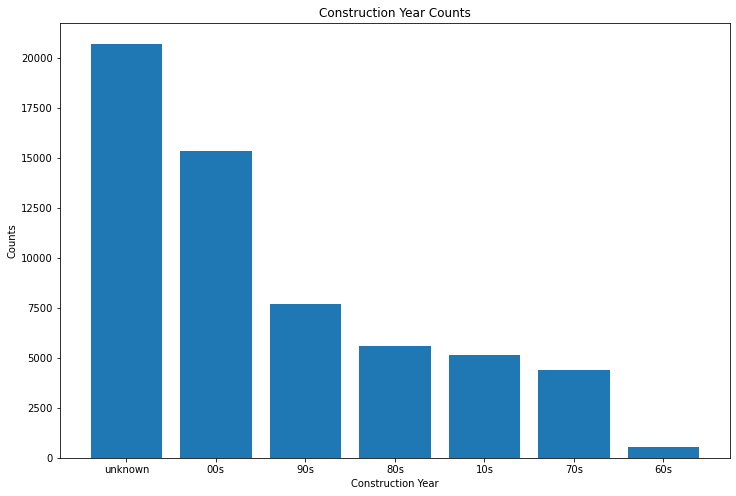

In [142]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.bar(train_df['construction_year'].value_counts().index, train_df['construction_year'].value_counts().values)
plt.xlabel('Construction Year')
plt.ylabel('Counts')
plt.title('Construction Year Counts')
plt.show()


Most of the wells were constructed between 2000 and 2010.

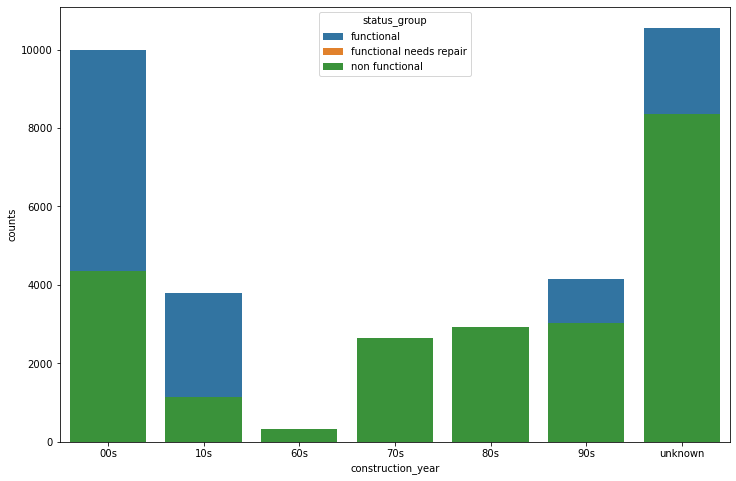

In [145]:
construction_year_group = train_df.groupby(['construction_year', 'status_group']).size().reset_index(name='counts')
plt.figure(figsize=(12,8))
sns.barplot(x='construction_year', y='counts', hue='status_group', data=construction_year_group, dodge=False)
plt.show()


It's interesting to note that most of the wells contructed between the 60s and 80s are mostly non_functional. This should be investigated further.

In [ ]:
train_df.status_group_vals.value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

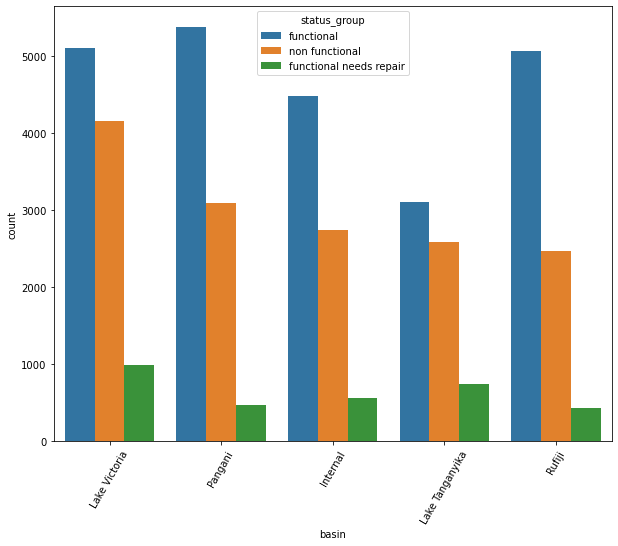

In [154]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the top 5 basins based on the count of values
top_5_basins = train_df["basin"].value_counts().head(5).index

# Select only the rows where basin is in the top 5 basins
filtered_df = train_df[train_df["basin"].isin(top_5_basins)]

# Create a bar plot
plt.figure(figsize=(10,8))
sns.countplot(x='basin', hue='status_group', data=filtered_df)
plt.xticks(rotation=60)
plt.show()


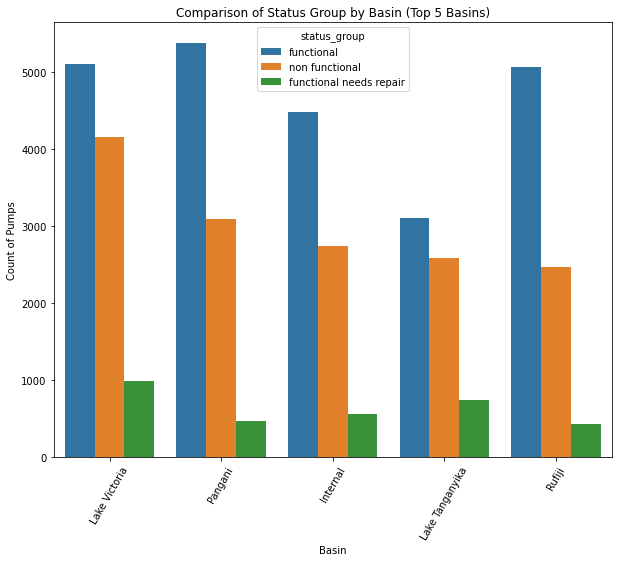

In [156]:
# Filter the top 5 basins
top_5_basins = train_df['basin'].value_counts().nlargest(5).index
train_df = train_df[train_df['basin'].isin(top_5_basins)]

# Plot the bar plot
plt.figure(figsize=(10, 8))
sns.countplot(x='basin', hue='status_group', data=train_df)
plt.title('Comparison of Status Group by Basin (Top 5 Basins)')
plt.xlabel('Basin')
plt.ylabel('Count of Pumps')
plt.xticks(rotation=60)
plt.show()


#### V) Examine Target Variable

In [ ]:
#convert status_group to numerical for modelling purpose
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(train_df.status_group)
train_df['status_group_vals'] = le.transform(train_df.status_group)